# 데이터셋_4(심각도) =>
## 데이터셋_3(심각도)에서 '기타/불명' 및 '기타' 컬럼을 모두 제외한 것임

In [15]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm

In [29]:
df=pd.read_csv('C:/Users/user/TEST3/csv파일/데이터셋_4(EPDO1).csv',encoding='cp949')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27284 entries, 0 to 27283
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고유형        27284 non-null  object
 1   연령가해자       27284 non-null  object
 2   법규위반가해자     27284 non-null  object
 3   행동유형가해자     27284 non-null  object
 4   피해자신체상해주부위  27284 non-null  object
 5   차량용도가해자     27284 non-null  object
 6   도로종류        27284 non-null  object
 7   도로형태        27284 non-null  object
 8   도로선형        27284 non-null  object
 9   발생시각        27284 non-null  object
 10  EPDO1       27284 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.3+ MB


In [31]:
df

,사고유형,연령가해자,법규위반가해자,행동유형가해자,피해자신체상해주부위,차량용도가해자,도로종류,도로형태,도로선형,발생시각,EPDO1
0,횡단중,65세이상,그룹1,그룹2,그룹5,그룹4,시도,단일로,평지,출퇴근시간,32
1,횡단중,51-60세,그룹1,그룹3,그룹4,그룹1,시도,교차로,평지,저녁~자정,32
2,길가장자리구역통행중,31-40세,그룹1,그룹3,그룹3,그룹4,시도,단일로,평지,낮,32
3,횡단중,41-50세,그룹1,그룹2,그룹4,그룹1,시도,단일로,평지,출퇴근시간,32
4,횡단중,51-60세,그룹2,그룹3,그룹4,그룹1,시도,교차로,평지,낮,32
...,...,...,...,...,...,...,...,...,...,...,...
27279,횡단중,31-40세,그룹1,그룹2,그룹5,그룹4,시도,교차로,평지,낮,273
27280,횡단중,41-50세,그룹1,그룹3,그룹5,그룹2,군도,교차로,평지,출퇴근시간,32
27281,횡단중,41-50세,그룹2,그룹3,그룹5,그룹1,시도,교차로,평지,출퇴근시간,32
27282,길가장자리구역통행중,51-60세,그룹1,그룹2,그룹2,그룹4,시도,단일로,평지,낮,2


# 전체 변수들과의 ols 회귀분석 진행
### 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할
##### Split Data Set Shape 출력물

In [34]:
feature_columns = df.columns.difference(["EPDO1"]) # Target column 빼기

y=pd.DataFrame(df['EPDO1'])
x=df.drop(['EPDO1'],axis=1)
X=pd.get_dummies(x,drop_first=True)


train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(19098, 35) (8186, 35) (19098, 1) (8186, 1)


# train & OLS 회귀모델 적합

In [35]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.401
Method:                 Least Squares   F-statistic:                              367.0
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:18:06   Log-Likelihood:                     -1.0778e+05
No. Observations:               19098   AIC:                                  2.156e+05
Df Residuals:                   19063   BIC:                                  2.159e+05
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         8.3510      3.109      2.686      0.007       2.257      14.445
사고유형_차도통행중         4.0458      2.079      1.946      0.052      -0.028       8.120
사고유형_횡단중           7.5835      1.790      4.236      0.000       4.075      11.092
연령가해자_21-30세       2.3978      3.906      0.614      0.539      -5.259      10.055
연령가해자_31-40세       2.1680      3.850      0.563      0.573      -5.379       9.715
연령가해자_41-50세       3.7529      3.792      0.990      0.322      -3.679      11.185
연령가해자_51-60세       2.6825      3.780      0.710      0.478      -4.728      10.092
연령가해자_61-64세       0.8530      4.024      0.212      0.832      -7.035       8.740
연령가해자_65세이상       -0.1500      3.859     -0.039      0.969      -7.714       7.414
법규위반가해자_그룹2       -5.1495      1.182     -4.358      0.000      -7.466      -2.833
법규위반가해자_그룹3      111.2276      5.363     20.741      0.000     100.716     121.739
행동유형가해자_그룹2       17.8720      2.283      7.828      0.000      13.397      22.347
행동유형가해자_그룹3        0.4035      2.409      0.167      0.867      -4.318       5.125
행동유형가해자_그룹4        5.3306      9.032      0.590      0.555     -12.374      23.035
피해자신체상해주부위_그룹2    18.8378     10.004      1.883      0.060      -0.771      38.447
피해자신체상해주부위_그룹3    21.5086      9.926      2.167      0.030       2.053      40.964
피해자신체상해주부위_그룹4    29.7346      9.913      2.999      0.003      10.304      49.166
피해자신체상해주부위_그룹5    68.3360      9.913      6.894      0.000      48.906      87.766
피해자신체상해주부위_그룹6    53.1199     10.020      5.301      0.000      33.479      72.761
차량용도가해자_그룹2        6.7516      2.861      2.360      0.018       1.144      12.359
차량용도가해자_그룹3      -24.7595      2.354    -10.518      0.000     -29.374     -20.146
차량용도가해자_그룹4       -9.7519      1.164     -8.378      0.000     -12.033      -7.470
차량용도가해자_그룹5      -31.7018      4.298     -7.376      0.000     -40.127     -23.277
도로종류_군도            4.4701     10.785      0.414      0.679     -16.670      25.610
도로종류_시도           -0.2529     10.653     -0.024      0.981     -21.134      20.628
도로종류_일반국도         28.6414     10.810      2.650      0.008       7.453      49.830
도로종류_지방도          14.2795     10.773      1.325      0.185      -6.837      35.396
도로종류_특별광역시도       -5.2778     10.641     -0.496      0.620     -26.135      15.580
도로형태_단일로          -0.9708      1.142     -0.850      0.395      -3.210       1.268
도로형태_주차장          -9.5139     11.808     -0.806      0.420     -32.658      13.630
도로선형_오르막          -5.0882      2.870     -1.773      0.076     -10.713       0.537
도로선형_평지          -12.0172      2.076     -5.789      0.000     -16.086      -7.949
발생시각_새벽~아침        21.9074      1.596     13.728      0.000      18.779      25.

# 다중공선성 검사

## 출력된 VIF Factor 값이 10크면 다중공선성이 있다는 것이다.

In [36]:
corolla = pd.concat([train_x,train_y],axis=1)  # 더미변수 + 종속변수 
#corolla = sm.add_constant(corolla, has_constant='add')

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,1.449597,사고유형_보도통행중
1,2.543644,사고유형_차도통행중
2,9.481180,사고유형_횡단중
3,5.948205,연령가해자_21-30세
4,9.376056,연령가해자_31-40세
5,13.203055,연령가해자_41-50세
6,15.677522,연령가해자_51-60세
7,5.785995,연령가해자_61-64세
8,8.858680,연령가해자_65세이상
9,1.728094,법규위반가해자_그룹2


## VIF Factor가 100 이상인 아래 컬럼 삭제 후 재진행

In [38]:
X = X.drop(['피해자신체상해주부위_그룹4','피해자신체상해주부위_그룹5','도로종류_시도','도로종류_특별광역시도'],axis=1)
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

# 삭제 한 후의 OLS 결과

In [39]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.372
Model:                            OLS   Adj. R-squared (uncentered):              0.371
Method:                 Least Squares   F-statistic:                              363.9
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:19:10   Log-Likelihood:                     -1.0832e+05
No. Observations:               19098   AIC:                                  2.167e+05
Df Residuals:                   19067   BIC:                                  2.169e+05
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중        13.2808      3.159      4.205      0.000       7.090      19.472
사고유형_차도통행중         9.3516      2.072      4.513      0.000       5.290      13.413
사고유형_횡단중          12.9066      1.770      7.290      0.000       9.436      16.377
연령가해자_21-30세      25.0802      3.015      8.318      0.000      19.170      30.991
연령가해자_31-40세      26.1143      2.869      9.103      0.000      20.492      31.737
연령가해자_41-50세      25.7802      2.764      9.326      0.000      20.362      31.199
연령가해자_51-60세      24.2888      2.739      8.869      0.000      18.921      29.657
연령가해자_61-64세      22.3615      3.087      7.243      0.000      16.310      28.413
연령가해자_65세이상       21.8550      2.864      7.631      0.000      16.241      27.469
법규위반가해자_그룹2       -5.3677      1.212     -4.429      0.000      -7.743      -2.992
법규위반가해자_그룹3      127.8236      5.536     23.091      0.000     116.973     138.674
행동유형가해자_그룹2       23.1165      2.204     10.487      0.000      18.796      27.437
행동유형가해자_그룹3        5.0033      2.306      2.170      0.030       0.484       9.523
행동유형가해자_그룹4       11.8718      9.035      1.314      0.189      -5.837      29.580
피해자신체상해주부위_그룹2   -29.0988      1.797    -16.192      0.000     -32.621     -25.576
피해자신체상해주부위_그룹3   -24.2037      1.251    -19.345      0.000     -26.656     -21.751
피해자신체상해주부위_그룹6     4.9357      1.931      2.556      0.011       1.150       8.721
차량용도가해자_그룹2        7.2575      2.942      2.467      0.014       1.491      13.024
차량용도가해자_그룹3      -22.1023      2.347     -9.416      0.000     -26.703     -17.501
차량용도가해자_그룹4       -9.6214      1.179     -8.157      0.000     -11.933      -7.310
차량용도가해자_그룹5      -22.8638      4.361     -5.243      0.000     -31.412     -14.316
도로종류_군도            7.9159      2.145      3.691      0.000       3.712      12.120
도로종류_일반국도         35.8749      2.237     16.035      0.000      31.490      40.260
도로종류_지방도          20.0531      1.918     10.456      0.000      16.294      23.812
도로형태_단일로           0.7208      1.148      0.628      0.530      -1.530       2.971
도로형태_주차장          -0.8377     11.952     -0.070      0.944     -24.264      22.588
도로선형_오르막           5.9211      2.837      2.087      0.037       0.361      11.482
도로선형_평지           -2.4788      1.987     -1.247      0.212      -6.374       1.416
발생시각_새벽~아침        25.9563      1.631     15.915      0.000      22.760      29.153
발생시각_저녁~자정        16.7008      1.748      9.556      0.000      13.275      20.127
발생시각_출퇴근시간         8.4640      1.180      7.173      0.000       6.151      10.777
==============================================================================
Omnibus:                     8845.071   Durbin-Watson:                   1.976
Prob

## 여기서 P값이 유의하지 않은 컬럼 제거

In [40]:
X = X.drop(['행동유형가해자_그룹4','도로형태_단일로','도로형태_주차장','도로선형_평지'],axis=1)
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  EPDO1   R-squared (uncentered):                   0.368
Model:                            OLS   Adj. R-squared (uncentered):              0.367
Method:                 Least Squares   F-statistic:                              411.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        14:19:53   Log-Likelihood:                     -1.0819e+05
No. Observations:               19098   AIC:                                  2.164e+05
Df Residuals:                   19071   BIC:                                  2.166e+05
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중        11.2256      3.130      3.587      0.000       5.091      17.360
사고유형_차도통행중         8.3363      2.055      4.057      0.000       4.308      12.364
사고유형_횡단중          12.5563      1.747      7.187      0.000       9.132      15.981
연령가해자_21-30세      25.7164      2.704      9.511      0.000      20.417      31.016
연령가해자_31-40세      25.7124      2.519     10.208      0.000      20.775      30.650
연령가해자_41-50세      24.8914      2.390     10.416      0.000      20.207      29.575
연령가해자_51-60세      24.7088      2.354     10.495      0.000      20.094      29.323
연령가해자_61-64세      22.5930      2.749      8.219      0.000      17.205      27.981
연령가해자_65세이상       21.0094      2.515      8.353      0.000      16.080      25.939
법규위반가해자_그룹2       -4.9926      1.200     -4.162      0.000      -7.344      -2.641
법규위반가해자_그룹3      119.7676      5.421     22.094      0.000     109.142     130.393
행동유형가해자_그룹2       21.4146      2.066     10.366      0.000      17.366      25.464
행동유형가해자_그룹3        4.2403      2.152      1.970      0.049       0.022       8.459
피해자신체상해주부위_그룹2   -28.4095      1.776    -15.998      0.000     -31.890     -24.929
피해자신체상해주부위_그룹3   -24.3433      1.236    -19.688      0.000     -26.767     -21.920
피해자신체상해주부위_그룹6     4.0600      1.918      2.117      0.034       0.301       7.820
차량용도가해자_그룹2        6.3860      3.008      2.123      0.034       0.490      12.282
차량용도가해자_그룹3      -21.0586      2.290     -9.196      0.000     -25.547     -16.570
차량용도가해자_그룹4      -10.0358      1.167     -8.602      0.000     -12.323      -7.749
차량용도가해자_그룹5      -22.7913      4.336     -5.257      0.000     -31.290     -14.293
도로종류_군도           10.1815      2.142      4.753      0.000       5.983      14.380
도로종류_일반국도         37.0098      2.256     16.405      0.000      32.588      41.432
도로종류_지방도          18.2714      1.894      9.646      0.000      14.559      21.984
도로선형_오르막           6.6950      2.147      3.118      0.002       2.487      10.903
발생시각_새벽~아침        26.1187      1.621     16.116      0.000      22.942      29.295
발생시각_저녁~자정        15.3695      1.732      8.874      0.000      11.975      18.764
발생시각_출퇴근시간         8.6240      1.171      7.364      0.000       6.329      10.919
==============================================================================
Omnibus:                     8929.198   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40543.436
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       8.381   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Stand

# 다중공선성 재검사
#### ▶ 행동유형가해자 그룹2 의 vif > 10 이지만 제거하면 행동유형가해자 컬럼이 '그룹3'만 남기때문에 비교를 위해 삭제 안 함

In [41]:
corolla = pd.concat([train_x,train_y],axis=1)  

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,1.395611,사고유형_보도통행중
1,2.370827,사고유형_차도통행중
2,8.707918,사고유형_횡단중
3,2.766094,연령가해자_21-30세
4,3.898591,연령가해자_31-40세
5,4.979548,연령가해자_41-50세
6,5.894640,연령가해자_51-60세
7,2.572665,연령가해자_61-64세
8,3.634182,연령가해자_65세이상
9,1.717728,법규위반가해자_그룹2


## y 예측값
####  → 소수 첫째자리에서 반올림해서 나타내겠음 

In [43]:
pred_y = fitted_full_model.predict(test_x)
pred_y = pd.DataFrame(pred_y)
pred_y.rename(columns ={0:'y예측'},inplace=True)

for i in range(len(pred_y)):
     pred_y.iloc[i] = int(pred_y.iloc[i])
     pred_y.iloc[i] =  round(pred_y.iloc[i],0)

In [45]:
pred_y.transpose()

,23858,15062,9684,16355,17867,16240,21014,7057,2115,9426,...,19285,27021,21622,21211,11594,8544,5326,22108,20945,7730
y예측,41.0,53.0,67.0,66.0,48.0,57.0,54.0,31.0,32.0,22.0,...,40.0,74.0,67.0,-1.0,3.0,23.0,57.0,26.0,54.0,13.0


In [46]:
cnt = pred_y['y예측'].value_counts()
cnt = pd.DataFrame(cnt)
cnt.transpose()

,53.0,58.0,36.0,57.0,41.0,44.0,32.0,49.0,48.0,35.0,...,211.0,213.0,186.0,119.0,187.0,217.0,179.0,164.0,174.0,172.0
y예측,226,199,195,189,173,173,163,161,154,150,...,1,1,1,1,1,1,1,1,1,1


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

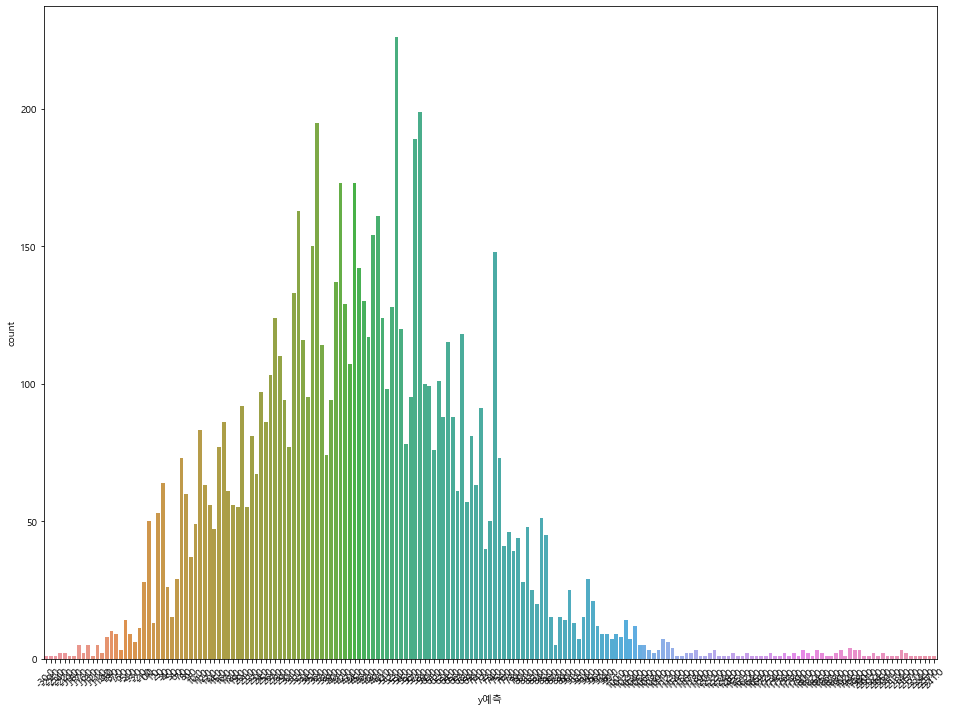

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=pred_y, x="y예측", ax=ax1)
plt.xticks(rotation=45)

---

---

---

# ■ 최적의 OLS 모델 선택
# Case.1 상수항 추가

# 0.변수선택법

In [48]:
feature_columns = train_x.columns.difference(["EPDO1"])

In [62]:
#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=train_x1,y=train_y,feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C02F8CD0>, 'AIC': 216425.82977240992}


In [50]:
train_x1= sm.add_constant(train_x, has_constant='add')

In [51]:
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['const']),k): 
        combo=(list(combo)+['const'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

In [52]:
print(getBest(x=train_x1,y=train_y,k=2))

Processed 351 models on 2 predictors in 1.068134069442749 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                 217829
Name: 194, dtype: object


In [53]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x1,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 27 models on 1 predictors in 0.0800626277923584 seconds.
Processed 351 models on 2 predictors in 1.0637288093566895 seconds.
Processed 2925 models on 3 predictors in 16.01069474220276 seconds.
Processed 17550 models on 4 predictors in 546.0619950294495 seconds.
Total elapsed time :  643.9106855392456 seconds
             AIC                                              model
1  218207.784469  <statsmodels.regression.linear_model.Regressio...
2  217828.902799  <statsmodels.regression.linear_model.Regressio...
3  217516.868467  <statsmodels.regression.linear_model.Regressio...
4  217221.479240  <statsmodels.regression.linear_model.Regressio...


In [54]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EPDO1   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     434.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:34:29   Log-Likelihood:            -1.0861e+05
No. Observations:               19098   AIC:                         2.172e+05
Df Residuals:                   19093   BIC:                         2.173e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
도로종류_일반국도         39.4706      2.280     17.310      0.000      35.001      43.940
법규위반가해자_그룹3      134.2443      5.501     24.403      0.000     123.462     145.027
피해자신체상해주부위_그룹2   -31.7043      1.799    -17.626      0.000     -35.230     -28.179
피해자신체상해주부위_그룹3   -27.9901      1.243    -22.515      0.000     -30.427     -25.553
const             52.5664      0.646     81.410      0.000      51.301      53.832
==============================================================================
Omnibus:                     9571.305   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47049.448
Skew:                           2.515   Prob(JB):                         0.00
Kurtosis:                       8.815   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.전진선택법

In [58]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['const'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['const']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x1,train_y)
 
print(forwordBestModel.summary())

Processed  27 models on 1 predictors in 0.2508811950683594
Selected predictors: ['법규위반가해자_그룹3', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C0186610>
Processed  26 models on 2 predictors in 0.24491667747497559
Selected predictors: ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C0186670>
Processed  25 models on 3 predictors in 0.5574114322662354
Selected predictors: ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C0292A30>
Processed  24 models on 4 predictors in 0.35895538330078125
Selected predictors: ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '도로종류_일반국도', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C0292EE0>
Processed  23 models on 5 predictors in 0.3780052661895752
Selected predictors:

                            OLS Regression Results                            
Dep. Variable:                  EPDO1   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     124.7
Date:                Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:38:15   Log-Likelihood:            -1.0815e+05
No. Observations:               19098   AIC:                         2.164e+05
Df Residuals:                   19075   BIC:                         2.165e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
법규위반가해자_그룹3      119.3247      5.410     22.

# 2.후진제거법

In [61]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['const']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['const'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x1,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != 'const']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x1,train_y)
print(backwardBestModel.summary())

Processed 27 models on 26 predictors in 1.0900063514709473
Selected predictors : ['도로선형_오르막', '도로종류_군도', '도로종류_일반국도', '도로종류_지방도', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹2', '법규위반가해자_그룹3', '사고유형_보도통행중', '사고유형_차도통행중', '사고유형_횡단중', '연령가해자_21-30세', '연령가해자_31-40세', '연령가해자_41-50세', '연령가해자_61-64세', '연령가해자_65세이상', '차량용도가해자_그룹2', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹6', '행동유형가해자_그룹2', '행동유형가해자_그룹3', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA73D880>
Processed 26 models on 25 predictors in 1.2096965312957764
Selected predictors : ['도로선형_오르막', '도로종류_군도', '도로종류_일반국도', '도로종류_지방도', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹2', '법규위반가해자_그룹3', '사고유형_보도통행중', '사고유형_차도통행중', '사고유형_횡단중', '연령가해자_21-30세', '연령가해자_31-40세', '연령가해자_61-64세', '연령가해자_65세이상', '차량용도가해자_그룹2', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹6', '행동유형가해자_

# 3.단계적선택법

In [60]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['const']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != 'const']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x1,train_y)
print(stepwiseBestModel.summary())

Processed  27 models on 1 predictors in 0.18767476081848145
Selected predictors: ['법규위반가해자_그룹3', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C023B820>
forward
Processed 1 models on 0 predictors in 0.0
Selected predictors : ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C4D2DA90>
Processed  26 models on 2 predictors in 0.18733763694763184
Selected predictors: ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C4D4CA00>
forward
Processed 2 models on 1 predictors in 0.010026693344116211
Selected predictors : ['법규위반가해자_그룹3', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C4D895E0>
Processed  25 models on 3 predictors in 0.13335394859313965
Selected predictors: ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', 'const'] AIC :  <statsmodels.regression.linear_

Processed  13 models on 15 predictors in 0.31333327293395996
Selected predictors: ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '도로종류_일반국도', '행동유형가해자_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '발생시각_저녁~자정', '발생시각_출퇴근시간', '도로종류_군도', '사고유형_횡단중', '법규위반가해자_그룹2', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C0234DF0>
forward
Processed 15 models on 14 predictors in 0.24214434623718262
Selected predictors : ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '도로종류_일반국도', '행동유형가해자_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '발생시각_저녁~자정', '발생시각_출퇴근시간', '사고유형_횡단중', '법규위반가해자_그룹2', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C023B940>
Processed  12 models on 16 predictors in 0.24414896965026855
Selected predictors: ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '도로종류_일반국도', '행동유형가해자_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '차

Processed 23 models on 22 predictors in 0.7540056705474854
Selected predictors : ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '도로종류_일반국도', '행동유형가해자_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '발생시각_저녁~자정', '발생시각_출퇴근시간', '도로종류_군도', '사고유형_횡단중', '법규위반가해자_그룹2', '도로선형_오르막', '연령가해자_65세이상', '차량용도가해자_그룹2', '피해자신체상해주부위_그룹6', '연령가해자_61-64세', '사고유형_보도통행중', '사고유형_차도통행중', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C0234250>
backward
Processed  5 models on 23 predictors in 0.15691661834716797
Selected predictors: ['법규위반가해자_그룹3', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '도로종류_일반국도', '행동유형가해자_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '발생시각_저녁~자정', '발생시각_출퇴근시간', '도로종류_군도', '사고유형_횡단중', '법규위반가해자_그룹2', '도로선형_오르막', '연령가해자_65세이상', '차량용도가해자_그룹2', '피해자신체상해주부위_그룹6', '연령가해자_61-64세', '사고유형_보도통행중', '사고유형_차도통행중', '행동유형가해자_그룹3', 'const'] AIC :  <statsmodels.regression.linear_model.RegressionRe

----

---

# Case.2 상수항 없고 원점을 지나는 회귀모델

# 0.변수선택법

In [64]:
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['사고유형_횡단중']),k): 
        combo=(list(combo)+['사고유형_횡단중'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

print(getBest(x=train_x,y=train_y,k=2))

Processed 325 models on 2 predictors in 3.7318708896636963 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                 218440
Name: 187, dtype: object


In [65]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x1,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 27 models on 1 predictors in 0.15299153327941895 seconds.
Processed 351 models on 2 predictors in 3.658783197402954 seconds.
Processed 2925 models on 3 predictors in 35.08612275123596 seconds.
Processed 17550 models on 4 predictors in 391.32222294807434 seconds.
Total elapsed time :  458.4096302986145 seconds
             AIC                                              model
1  218846.939078  <statsmodels.regression.linear_model.Regressio...
2  218182.482288  <statsmodels.regression.linear_model.Regressio...
3  217804.352774  <statsmodels.regression.linear_model.Regressio...
4  217502.453340  <statsmodels.regression.linear_model.Regressio...


In [66]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  EPDO1   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     358.3
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          5.66e-298
Time:                        14:50:12   Log-Likelihood:            -1.0875e+05
No. Observations:               19098   AIC:                         2.175e+05
Df Residuals:                   19093   BIC:                         2.175e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             51.2826      1.076     47.668      0.000      49.174      53.391
법규위반가해자_그룹3      140.4371      5.529     25.399      0.000     129.599     151.275
피해자신체상해주부위_그룹2   -31.7715      1.816    -17.500      0.000     -35.330     -28.213
피해자신체상해주부위_그룹3   -28.2536      1.252    -22.560      0.000     -30.708     -25.799
사고유형_횡단중           4.7439      1.171      4.052      0.000       2.449       7.039
==============================================================================
Omnibus:                     9733.638   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48555.836
Skew:                           2.563   Prob(JB):                         0.00
Kurtosis:                       8.895   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1. 전진선택법

In [67]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['사고유형_횡단중'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['사고유형_횡단중']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['사고유형_횡단중']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != '사고유형_횡단중']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x,train_y)
 
print(forwordBestModel.summary())

Processed  26 models on 1 predictors in 0.22322845458984375
Selected predictors: ['행동유형가해자_그룹2', '사고유형_횡단중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA5D7310>
Processed  25 models on 2 predictors in 0.24565339088439941
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '사고유형_횡단중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA5EB460>
Processed  24 models on 3 predictors in 0.2817494869232178
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '사고유형_횡단중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA5D78B0>
Processed  23 models on 4 predictors in 0.29578614234924316
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '도로종류_일반국도', '사고유형_횡단중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA5EB4F0>
Processed  22 models on 5 predictors in 0.3333866596221924
Selected predictors: [

Processed  3 models on 24 predictors in 0.16886377334594727
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '도로종류_일반국도', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '사고유형_차도통행중', '차량용도가해자_그룹3', '발생시각_저녁~자정', '발생시각_출퇴근시간', '도로종류_군도', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '사고유형_보도통행중', '법규위반가해자_그룹2', '도로선형_오르막', '차량용도가해자_그룹2', '피해자신체상해주부위_그룹6', '연령가해자_51-60세', '연령가해자_41-50세', '연령가해자_31-40세', '연령가해자_21-30세', '사고유형_횡단중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA5D7EE0>
Processed  2 models on 25 predictors in 0.09424972534179688
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '도로종류_일반국도', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '사고유형_차도통행중', '차량용도가해자_그룹3', '발생시각_저녁~자정', '발생시각_출퇴근시간', '도로종류_군도', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '사고유형_보도통행중', '법규위반가해자_그룹2', '도로선형_오르막', '차량용도가해자_그룹2', '피해자신체상해주부위_그룹6', '연령가해자_51-60세', '연령가해자_41-50세', '연령가해자_31-40세', '연령가해자_21-30세', '연령가해자_65세이상'

# 2. 후진제거법

In [68]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['사고유형_횡단중']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['사고유형_횡단중'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != '사고유형_횡단중']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x,train_y)
print(backwardBestModel.summary())

Processed 26 models on 25 predictors in 1.2427515983581543
Selected predictors : ['도로선형_오르막', '도로종류_군도', '도로종류_일반국도', '도로종류_지방도', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹2', '법규위반가해자_그룹3', '사고유형_보도통행중', '사고유형_차도통행중', '연령가해자_21-30세', '연령가해자_31-40세', '연령가해자_41-50세', '연령가해자_51-60세', '연령가해자_61-64세', '연령가해자_65세이상', '차량용도가해자_그룹2', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹6', '행동유형가해자_그룹2', '사고유형_횡단중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044C9CF45B0>
Processed 25 models on 24 predictors in 1.1622254848480225
Selected predictors : ['도로선형_오르막', '도로종류_군도', '도로종류_일반국도', '도로종류_지방도', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹2', '법규위반가해자_그룹3', '사고유형_보도통행중', '사고유형_차도통행중', '연령가해자_21-30세', '연령가해자_31-40세', '연령가해자_41-50세', '연령가해자_51-60세', '연령가해자_61-64세', '연령가해자_65세이상', '차량용도가해자_그룹2', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '행동유형가해자_그룹2', 

# 단계적선택법

In [69]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['사고유형_횡단중'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['사고유형_횡단중']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != '사고유형_횡단중']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != '사고유형_횡단중']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x,train_y)
print(stepwiseBestModel.summary())

Processed  26 models on 1 predictors in 0.23002934455871582
Selected predictors: ['행동유형가해자_그룹2', '사고유형_횡단중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA578040>
forward
Processed 1 models on 0 predictors in 0.006015777587890625
Selected predictors : ['사고유형_횡단중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA578730>
Processed  25 models on 2 predictors in 0.2610795497894287
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '사고유형_횡단중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA5845E0>
forward
Processed 2 models on 1 predictors in 0.017546892166137695
Selected predictors : ['행동유형가해자_그룹2', '사고유형_횡단중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA52F5E0>
Processed  24 models on 3 predictors in 0.2842555046081543
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '사고유형_횡단중'] AIC :  <statsmode

Processed  12 models on 15 predictors in 0.37743639945983887
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '도로종류_일반국도', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '사고유형_차도통행중', '차량용도가해자_그룹3', '발생시각_저녁~자정', '발생시각_출퇴근시간', '도로종류_군도', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '사고유형_횡단중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA51D670>
forward
Processed 15 models on 14 predictors in 0.4021117687225342
Selected predictors : ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '도로종류_일반국도', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '사고유형_차도통행중', '차량용도가해자_그룹3', '발생시각_저녁~자정', '발생시각_출퇴근시간', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '사고유형_횡단중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA51D340>
Processed  11 models on 16 predictors in 0.3534395694732666
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '도로종류_일반국도', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '발생시각

Processed 24 models on 23 predictors in 1.143395185470581
Selected predictors : ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '도로종류_일반국도', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '사고유형_차도통행중', '차량용도가해자_그룹3', '발생시각_저녁~자정', '발생시각_출퇴근시간', '도로종류_군도', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '사고유형_보도통행중', '법규위반가해자_그룹2', '도로선형_오르막', '차량용도가해자_그룹2', '연령가해자_51-60세', '연령가해자_41-50세', '연령가해자_31-40세', '연령가해자_21-30세', '사고유형_횡단중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000044CA52F400>
Processed  2 models on 25 predictors in 0.09376263618469238
Selected predictors: ['행동유형가해자_그룹2', '법규위반가해자_그룹3', '행동유형가해자_그룹3', '도로종류_일반국도', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹2', '발생시각_새벽~아침', '도로종류_지방도', '사고유형_차도통행중', '차량용도가해자_그룹3', '발생시각_저녁~자정', '발생시각_출퇴근시간', '도로종류_군도', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '사고유형_보도통행중', '법규위반가해자_그룹2', '도로선형_오르막', '차량용도가해자_그룹2', '피해자신체상해주부위_그룹6', '연령가해자_51-60세', '연령가해자_41-50세', '연령가해자_31-40세', '연령가해자_21-30세', '연령가해자_65세이상', '사고유형_횡단중'] AIC : 